# Reflexer Model & Simulation

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from models.v1.run import run

In [2]:
data = run()
S=data.substep.max()
fdf = data[data.substep==S]


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 13, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.33s


In [3]:
df = fdf
#df=fdf[fdf.timestep<100]


In [4]:
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

In [5]:
FXcols = ['error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price']


In [6]:
for c in FXcols:
    print(c)
    df[c]=df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [7]:
df['target_rate_hourly'] = df.target_rate*3600
df['error_star_derivative_scaled'] = df.error_star_derivative*3600
df['error_hat_derivative_scaled'] = df.error_star_derivative*3600


In [8]:
df.debt_price.plot()

In [30]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

In [10]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

In [11]:
def integral_plot(df):
    from matplotlib.patches import Rectangle

    df['seconds'] = df.timedelta.cumsum()


    x=df.seconds.values
    y=df.error_star.values
    h=(df.error_star.shift(periods=-1)+df.error_star)/2
    w=df.timedelta.values

    plt.figure(figsize=(18, 12))
    plt.plot(x,y , marker='.',linestyle='--', color='r')

    ax = plt.gca()

    for p in range(len(x)-1):
        ax.add_patch(
            Rectangle(
            (x[p], 0),
            w[p+1],
            h[p+1],
            edgecolor = 'blue',
            facecolor = 'cyan',
            fill=True
        ) )

    plt.title('Visualizing Numerical Integration')
    plt.xlabel('Time passed in seconds')
    plt.ylabel('Observed Error')

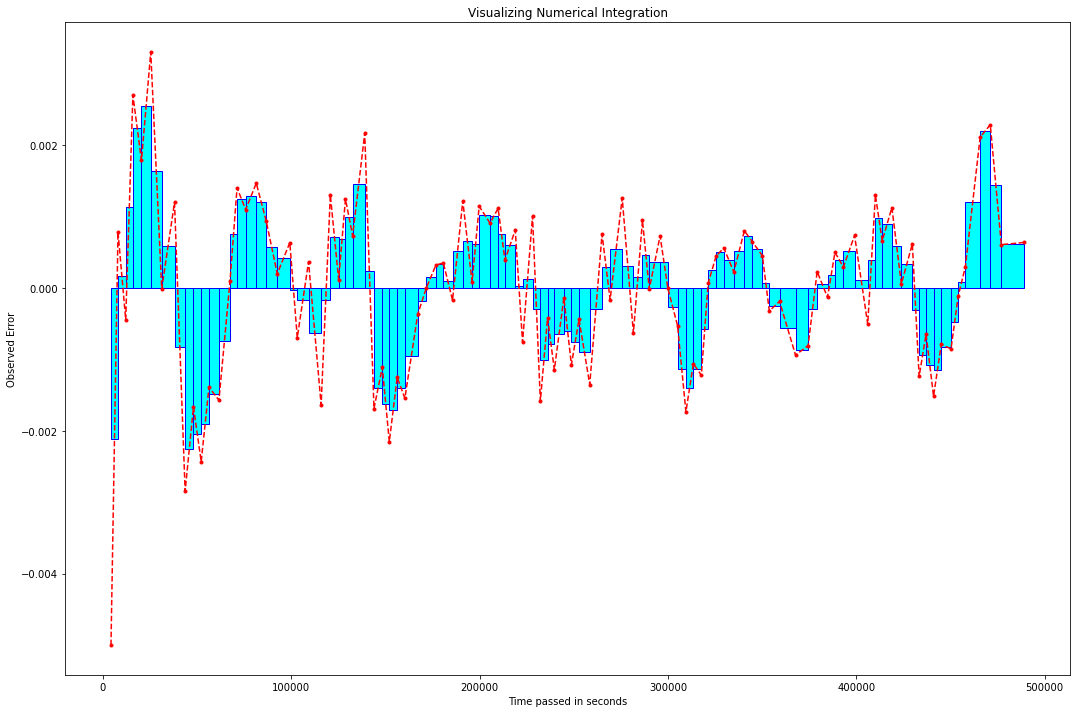

In [12]:
integral_plot(df[df.timestep<100])

In [13]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])

In [14]:
df.timedelta.apply(lambda x: x/3600).hist()

In [15]:
df.error_star.hist()

In [16]:
import seaborn as sns; sns.set(style="white", color_codes=True)

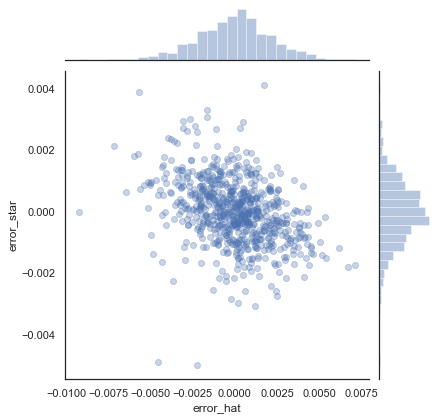

In [17]:
g = sns.jointplot(x="error_hat", y="error_star", alpha=.3, data=df)

In [18]:
3600**2

12960000